<a href="https://colab.research.google.com/github/andrew-voortman/ML_Loan_Prediction_Model/blob/main/Test_Loan_Prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline


In [2]:
# For creating models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
from google.colab import drive
drive.mount('/content/drive')
#train_df = pd.read_csv('/content/drive/My Drive/project4/Resources/train_u6lujuX_CVtuZ9i.csv')
#test_df = pd.read_csv('/content/drive/My Drive/project4/Resources/test_Y3wMUE5_7gLdaTN.csv')
preprocessing_df = pd.read_csv('/content/drive/My Drive/project4/Resources/preprocessed_train_data.csv')
preprocessing_df.head()

Mounted at /content/drive


,Gender,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849.0,121.0,360.0,1.0,Y,1,0,0,0,0,0,1
1,0,1,1,0,6091.0,128.0,360.0,1.0,N,0,1,0,0,1,0,0
2,0,1,1,1,3000.0,66.0,360.0,1.0,Y,1,0,0,0,0,0,1
3,0,1,0,0,4941.0,120.0,360.0,1.0,Y,1,0,0,0,0,0,1
4,0,0,1,0,6000.0,141.0,360.0,1.0,Y,1,0,0,0,0,0,1


In [4]:
# Encode target variable
def loan_status(loan):
    if loan == "Y":
        return 1
    else:
        return 0

# Call the encode_edu function on the Education column
preprocessing_df["Loan_Status"] = preprocessing_df["Loan_Status"].apply(loan_status)

# Review the DataFrame
preprocessing_df.head()

,Gender,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849.0,121.0,360.0,1.0,1,1,0,0,0,0,0,1
1,0,1,1,0,6091.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,0,1,1,1,3000.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,0,1,0,0,4941.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,0,0,1,0,6000.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1


In [5]:
# MODIFICATION
# Drop Gender Column
preprocessing_df.drop('Gender', axis=1, inplace=True)
preprocessing_df.head()

,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,5849.0,121.0,360.0,1.0,1,1,0,0,0,0,0,1
1,1,1,0,6091.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,1,1,1,3000.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,1,0,0,4941.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,0,1,0,6000.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1


In [6]:
# Split our preprocessed data into our features and target arrays
X = preprocessing_df.drop("Loan_Status", axis=1)
y = preprocessing_df["Loan_Status"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=25
hidden_nodes_layer2=5
hidden_nodes_layer3=1

nn = tf.keras.models.Sequential()



In [18]:
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='elu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='elu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='elu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 25)                375       
                                                                 
 dense_5 (Dense)             (None, 5)                 130       
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
14/14 [==============================] - 1s 2ms/step - loss: 0.6850 - accuracy: 0.5804
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.7031
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.7723
Epoch 4/50
14/14 [==============================] - 0s 3ms/step - loss: 0.6390 - accuracy: 0.7857
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.8080
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.8170
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.8237
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.8237
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.8237
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5543 - accuracy: 0.8237
Epoch 11/50
14/14 [

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 0.6069 - accuracy: 0.7600 - 221ms/epoch - 44ms/step
Loss: 0.6069465279579163, Accuracy: 0.7599999904632568


In [22]:
# Export our model to HDF5 file
nn.save('/content/drive/MyDrive/project4/Output/ModelTest.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
# Creating Logistic Regression Model
lr_model = LogisticRegression()

In [24]:
# Train the model
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = lr_model.predict(X_test)


In [26]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.33      0.45        46
           1       0.76      0.95      0.85       104

    accuracy                           0.76       150
   macro avg       0.76      0.64      0.65       150
weighted avg       0.76      0.76      0.73       150



In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.76


In [31]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)

In [32]:
predictions = rf_model.predict(X_test_scaled)

In [33]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [34]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,19,27
Actual 1,6,98


Accuracy Score : 0.78
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.41      0.54        46
           1       0.78      0.94      0.86       104

    accuracy                           0.78       150
   macro avg       0.77      0.68      0.70       150
weighted avg       0.78      0.78      0.76       150



In [35]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2875190734687152, 'Credit_History'),
 (0.25247186617829304, 'Total_Income'),
 (0.2228990229295184, 'LoanAmount'),
 (0.03824946428371582, 'Loan_Amount_Term'),
 (0.0265598657193585, 'Education'),
 (0.026529203047268572, 'Married'),
 (0.02623046411687426, 'Self_Employed'),
 (0.020616884942217133, 'Property_Area_Semiurban'),
 (0.01933079057149755, 'Property_Area_Rural'),
 (0.018262472585060942, 'Dependents_0'),
 (0.016956664136218942, 'Dependents_1'),
 (0.016019360274234222, 'Dependents_3+'),
 (0.014573594366948453, 'Dependents_2'),
 (0.01378127338007898, 'Property_Area_Urban')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

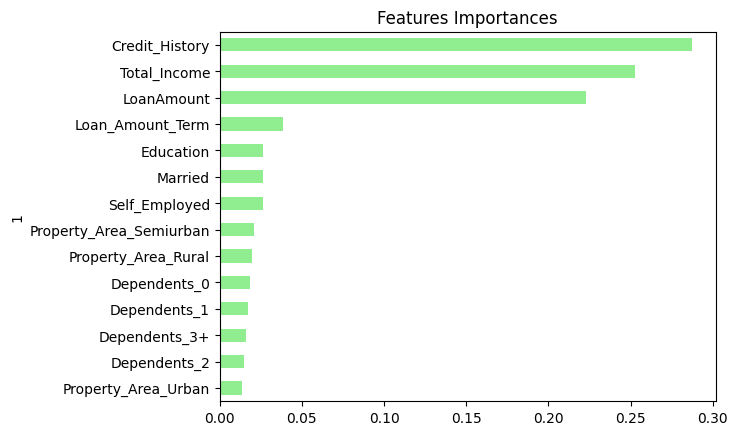

In [36]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)